In [1]:
import numpy as np
import pandas as pd
#import math
import sys,os

In [2]:
sys.path.append(os.path.abspath(os.path.join('../utils')))
from cleaner import *
from helper import *
from plot import *
from outlier_handler import OutlierHandler

In [3]:
df = pd.read_csv("../data/clean_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146887 entries, 0 to 146886
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      146887 non-null  int64  
 1   Bearer Id                       146887 non-null  int64  
 2   Start                           146887 non-null  object 
 3   Start ms                        146887 non-null  float64
 4   End                             146887 non-null  object 
 5   End ms                          146887 non-null  float64
 6   Dur. (ms)                       146887 non-null  float64
 7   IMSI                            146887 non-null  int64  
 8   MSISDN/Number                   146887 non-null  int64  
 9   IMEI                            146887 non-null  int64  
 10  Last Location Name              146887 non-null  object 
 11  Avg RTT DL (ms)                 146887 non-null  float64
 12  Avg RTT UL (ms) 

## Metrice for user experience

In [4]:
experience_analysis_df = df[['MSISDN/Number','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Handset Type']]

In [5]:
experience_analysis_df['Total Avg RTT (ms)'] = experience_analysis_df['Avg RTT DL (ms)'] + experience_analysis_df['Avg RTT UL (ms)'] 
experience_analysis_df['Total Avg Bearer TP (kbps)'] = experience_analysis_df['Avg Bearer TP DL (kbps)'] + experience_analysis_df['Avg Bearer TP UL (kbps)'] 
experience_analysis_df['Total TCP Retrans. Vol (Bytes)'] = experience_analysis_df['TCP DL Retrans. Vol (Bytes)'] + experience_analysis_df['TCP UL Retrans. Vol (Bytes)']
experience_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146887 entries, 0 to 146886
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   MSISDN/Number                   146887 non-null  int64  
 1   Avg RTT DL (ms)                 146887 non-null  float64
 2   Avg RTT UL (ms)                 146887 non-null  float64
 3   Avg Bearer TP DL (kbps)         146887 non-null  float64
 4   Avg Bearer TP UL (kbps)         146887 non-null  float64
 5   TCP DL Retrans. Vol (Bytes)     146887 non-null  float64
 6   TCP UL Retrans. Vol (Bytes)     146887 non-null  float64
 7   Handset Type                    146887 non-null  object 
 8   Total Avg RTT (ms)              146887 non-null  float64
 9   Total Avg Bearer TP (kbps)      146887 non-null  float64
 10  Total TCP Retrans. Vol (Bytes)  146887 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 12.3+ MB


C:\Users\Mahi\AppData\Local\Temp\ipykernel_8272\1774172515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experience_analysis_df['Total Avg RTT (ms)'] = experience_analysis_df['Avg RTT DL (ms)'] + experience_analysis_df['Avg RTT UL (ms)']
C:\Users\Mahi\AppData\Local\Temp\ipykernel_8272\1774172515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experience_analysis_df['Total Avg Bearer TP (kbps)'] = experience_analysis_df['Avg Bearer TP DL (kbps)'] + experience_analysis_df['Avg Bearer TP UL (kbps)']


In [6]:
experience_analysis_df.head(5)

MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0    33664962239             42.0              5.0                     23.0   
1    33681854413             65.0              5.0                     16.0   
2    33760627129             65.0              5.0                      6.0   
3    33750343200             65.0              5.0                     44.0   
4    33699795932             65.0              5.0                      6.0   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                     44.0                      19520.0   
1                     26.0                      19520.0   
2                      9.0                      19520.0   
3                     44.0                      19520.0   
4                      9.0                      19520.0   

   TCP UL Retrans. Vol (Bytes)                 Handset Type  \
0                       7230.0   Samsung Galaxy A5 Sm-A520F   
1                       7230.0  Samsung Galaxy J5 (Sm-J530)   
2                       7230.0     Samsung Galaxy A8 (2018)   
3                       7230.0                    undefined   
4                       7230.0             Samsung Sm-G390F   

   Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
0                47.0                        67.0   
1                70.0                        42.0   
2                70.0                        15.0   
3                70.0                        88.0   
4                70.0                        15.0   

   Total TCP Retrans. Vol (Bytes)  
0                         26750.0  
1                         26750.0  
2                         26750.0  
3                         26750.0  
4                         26750.0

In [7]:
experience_analysis_df = experience_analysis_df[['MSISDN/Number','Total Avg RTT (ms)','Total Avg Bearer TP (kbps)','Total TCP Retrans. Vol (Bytes)','Handset Type']]
experience_analysis_df.head()

MSISDN/Number  Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
0    33664962239                47.0                        67.0   
1    33681854413                70.0                        42.0   
2    33760627129                70.0                        15.0   
3    33750343200                70.0                        88.0   
4    33699795932                70.0                        15.0   

   Total TCP Retrans. Vol (Bytes)                 Handset Type  
0                         26750.0   Samsung Galaxy A5 Sm-A520F  
1                         26750.0  Samsung Galaxy J5 (Sm-J530)  
2                         26750.0     Samsung Galaxy A8 (2018)  
3                         26750.0                    undefined  
4                         26750.0             Samsung Sm-G390F

In [8]:
agg_experience_by_customer = experience_analysis_df.groupby('MSISDN/Number').agg({'Total Avg RTT (ms)': 'sum',
                                                                          'Total Avg Bearer TP (kbps)': 'sum',
                                                                          'Total TCP Retrans. Vol (Bytes)': 'sum', 
                                                                           'Handset Type': lambda x: x.mode()[0]})
agg_experience_by_customer.head()

Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
MSISDN/Number                                                   
33601001722                  46.0                        76.0   
33601001754                  31.0                        99.0   
33601002511                  59.0                        97.0   
33601007832                  84.0                       248.0   
33601008617                 119.0                     43204.5   

               Total TCP Retrans. Vol (Bytes)                    Handset Type  
MSISDN/Number                                                                  
33601001722                         2895381.0  Huawei P20 Lite Huawei Nova 3E  
33601001754                         7685875.5          Apple iPhone 7 (A1778)  
33601002511                         4150403.0                       undefined  
33601007832                            2396.0         Apple iPhone 5S (A1457)  
33601008617                         8047304.5         Apple iPhone Se (A1723)

## Compute & list 10 of the top, bottom and most frequent

In [9]:
# top 10 TCP values in the dataset

top_10_tcp = agg_experience_by_customer['Total TCP Retrans. Vol (Bytes)'].value_counts().head(10)
# Compute the bottom 10 TCP values
bottom_10_tcp = agg_experience_by_customer['Total TCP Retrans. Vol (Bytes)'].value_counts().tail(10)

# Compute the most frequent TCP value
most_frequent_tcp = agg_experience_by_customer['Total TCP Retrans. Vol (Bytes)'].value_counts().idxmax()
most_frequent_tcp

7824924.5

In [10]:
# top 10 RTT values in the dataset

top_10_rtt = agg_experience_by_customer['Total Avg RTT (ms)'].value_counts().head(10)
# Compute the bottom 10 RTT values
bottom_10_rtt = agg_experience_by_customer['Total Avg RTT (ms)'].value_counts().tail(10)

# Compute the most frequent RTT value
most_frequent_rtt = agg_experience_by_customer['Total Avg RTT (ms)'].value_counts().idxmax()
most_frequent_rtt

29.0

In [11]:
# top 10 ThroughPut values in the dataset
top_10_ThroughPut = agg_experience_by_customer['Total Avg Bearer TP (kbps)'].value_counts().head(10)
# Compute the bottom 10 TCP values
bottom_10_ThroughPut = agg_experience_by_customer['Total Avg Bearer TP (kbps)'].value_counts().tail(10)

# Compute the most frequent TCP value
most_frequent_ThroughPut = agg_experience_by_customer['Total Avg Bearer TP (kbps)'].value_counts().idxmax()
most_frequent_ThroughPut


15.0

In [12]:
# Group the dataset by handset type and calculate the average throughput
avg_throughput_per_handset = agg_experience_by_customer.groupby('Handset Type')['Total Avg Bearer TP (kbps)'].mean()

# sorting per tp
tp = avg_throughput_per_handset.sort_values(ascending=False)
tp.head()


Handset Type
Huawei Par-Lx9                        127454.0
Spa Condor Elect. Allure M2           102025.0
Asustek Wireless-Ac1200 Lte Router     79401.0
Lg-H860                                79107.5
Huawei B618S-22D                       78003.5
Name: Total Avg Bearer TP (kbps), dtype: float64

In [13]:
# Group the dataset by handset type and calculate the average throughput
avg_TCP_per_handset = agg_experience_by_customer.groupby('Handset Type')['Total TCP Retrans. Vol (Bytes)'].mean()

# sorting per tcp
tcp = avg_TCP_per_handset.sort_values(ascending=False)
tcp.head()


Handset Type
Sierra Wireless Usb305     15649849.00
Huawei Me909S-120          14731406.75
Sfr Star Trail 5 By Sfr     9822653.50
Huawei B715S-23C            8784713.15
Wistron Wnc D18Qx           8707483.50
Name: Total TCP Retrans. Vol (Bytes), dtype: float64

In [14]:
from sklearn.preprocessing import  RobustScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans

#metrice
experience_metrics = agg_experience_by_customer[['Total Avg RTT (ms)', 'Total Avg Bearer TP (kbps)', 'Total TCP Retrans. Vol (Bytes)']]
experience_metrics

Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
MSISDN/Number                                                     
33601001722                    46.0                        76.0   
33601001754                    31.0                        99.0   
33601002511                    59.0                        97.0   
33601007832                    84.0                       248.0   
33601008617                   119.0                     43204.5   
...                             ...                         ...   
33789967113                    53.0                        67.0   
33789980299                   109.0                     52859.0   
33789996170                    52.0                     10365.0   
33789997247                    40.0                       116.0   
337000037000919                60.0                        33.0   

                 Total TCP Retrans. Vol (Bytes)  
MSISDN/Number                                    
33601001722                           2895381.0  
33601001754                           7685875.5  
33601002511                           4150403.0  
33601007832                              2396.0  
33601008617                           8047304.5  
...                                         ...  
33789967113                             56578.0  
33789980299                           7835020.5  
33789996170                            218045.0  
33789997247                            247983.0  
337000037000919                        120596.0  

[105716 rows x 3 columns]

<Axes: >

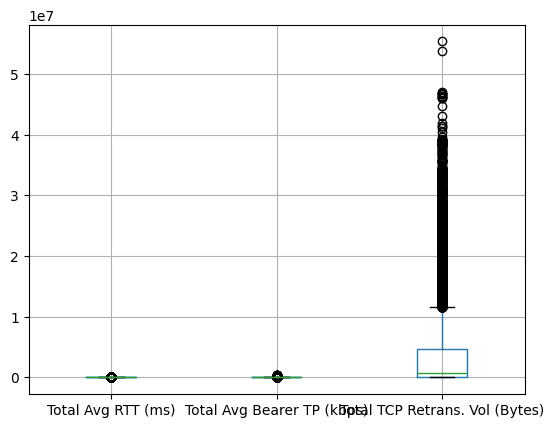

In [15]:
outlier_handler = OutlierHandler(experience_metrics)
experience_metrics.boxplot()

In [16]:
outlier_handler.getOverview(["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"])

Name of columns        Total Avg Bearer TP (kbps) Total Avg RTT (ms)  \
Min                                           0.0                0.0   
Q1                                           97.0               39.0   
Median                                      302.0               64.0   
Q3                                      25398.625              118.0   
Max                                      445187.0             1270.0   
IQR                                     25301.625               79.0   
Lower fence                           -37855.4375              -79.5   
Upper fence                            63351.0625              236.5   
Skew                                     3.269035           3.429897   
Number_of_outliers                           4950               4572   
Percentage_of_outliers                       3.3%              3.05%   

Name of columns        Total TCP Retrans. Vol (Bytes)  
Min                                              51.0  
Q1                                           83894.25  
Median                                       702503.5  
Q3                                          4669298.0  
Max                                        55343222.0  
IQR                                        4585403.75  
Lower fence                              -6794211.375  
Upper fence                              11547403.625  
Skew                                         2.762732  
Number_of_outliers                               3612  
Percentage_of_outliers                          2.41%

In [17]:
outlier_handler.replace_outliers_with_fences(["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"])

e:\week-1\Telecom_DataAnalysis\utils\outlier_handler.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = np.where(self.df[col] > upper, upper, self.df[col])
e:\week-1\Telecom_DataAnalysis\utils\outlier_handler.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = np.where(self.df[col] < lower, lower, self.df[col])
e:\week-1\Telecom_DataAnalysis\utils\outlier_handler.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [18]:
outlier_handler.getOverview(["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"])

Name of columns        Total Avg RTT (ms) Total Avg Bearer TP (kbps)  \
Min                                   0.0                        0.0   
Q1                                   39.0                       97.0   
Median                               64.0                      302.0   
Q3                                  118.0                  25398.625   
Max                                 236.5                 63351.0625   
IQR                                  79.0                  25301.625   
Lower fence                         -79.5                -37855.4375   
Upper fence                         236.5                 63351.0625   
Skew                             1.207379                   1.215236   
Number_of_outliers                      0                          0   
Percentage_of_outliers               0.0%                       0.0%   

Name of columns        Total TCP Retrans. Vol (Bytes)  
Min                                              51.0  
Q1                                           83894.25  
Median                                       702503.5  
Q3                                          4669298.0  
Max                                      11547403.625  
IQR                                        4585403.75  
Lower fence                              -6794211.375  
Upper fence                              11547403.625  
Skew                                          1.16677  
Number_of_outliers                                  0  
Percentage_of_outliers                           0.0%

In [19]:
def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)
def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)


In [20]:
#Normalize data
#normalized_metrice = normalizer(scaled_metrice)
#normalized_metrice


normalized_metrics = scaler(experience_metrics, ['Total Avg RTT (ms)',
    'Total Avg Bearer TP (kbps)',
    'Total TCP Retrans. Vol (Bytes)'])
normalized_metrics.describe()

Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
count       105716.000000               105716.000000   
mean             0.348834                    0.222822   
std              0.234005                    0.326709   
min              0.000000                    0.000000   
25%              0.164905                    0.001531   
50%              0.270613                    0.004767   
75%              0.498943                    0.400919   
max              1.000000                    1.000000   

       Total TCP Retrans. Vol (Bytes)  
count                   105716.000000  
mean                         0.227383  
std                          0.294822  
min                          0.000000  
25%                          0.007261  
50%                          0.060832  
75%                          0.404356  
max                          1.000000

In [21]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(normalized_metrics)
kmeans.labels_

array([2, 1, 2, ..., 2, 2, 2])

In [22]:
experience_metrics.insert(0, 'cluster', kmeans.labels_)
experience_metrics

cluster  Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
MSISDN/Number                                                              
33601001722            2                46.0                        76.0   
33601001754            1                31.0                        99.0   
33601002511            2                59.0                        97.0   
33601007832            2                84.0                       248.0   
33601008617            1               119.0                     43204.5   
...                  ...                 ...                         ...   
33789967113            2                53.0                        67.0   
33789980299            1               109.0                     52859.0   
33789996170            2                52.0                     10365.0   
33789997247            2                40.0                       116.0   
337000037000919        2                60.0                        33.0   

                 Total TCP Retrans. Vol (Bytes)  
MSISDN/Number                                    
33601001722                           2895381.0  
33601001754                           7685875.5  
33601002511                           4150403.0  
33601007832                              2396.0  
33601008617                           8047304.5  
...                                         ...  
33789967113                             56578.0  
33789980299                           7835020.5  
33789996170                            218045.0  
33789997247                            247983.0  
337000037000919                        120596.0  

[105716 rows x 4 columns]

In [23]:
experience_metrics['cluster'].value_counts()

cluster
2    63577
1    23591
0    18548
Name: count, dtype: int64

In [24]:
figure = px.scatter(experience_metrics, x='Total TCP Retrans. Vol (Bytes)', y='Total Avg Bearer TP (kbps)',
                 color='cluster', size='Total Avg RTT (ms)')
figure.show()

In [25]:
cluster0 = experience_metrics[experience_metrics["cluster"]==0]
cluster0[["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"]].describe()

Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
count        18548.000000                18548.000000   
mean           106.269975                44874.675750   
std             57.857043                11979.550637   
min             19.000000                12803.000000   
25%             62.000000                34441.625000   
50%             90.000000                48477.250000   
75%            137.000000                52765.000000   
max            236.500000                63351.062500   

       Total TCP Retrans. Vol (Bytes)  
count                    1.854800e+04  
mean                     1.790818e+06  
std                      1.978433e+06  
min                      9.700000e+01  
25%                      2.390990e+05  
50%                      1.013114e+06  
75%                      2.754196e+06  
max                      8.715230e+06

In [26]:
cluster1 = experience_metrics[experience_metrics["cluster"]==1]
cluster1[["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"]].describe()

Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
count        23591.000000                23591.000000   
mean           110.699970                20602.016577   
std             68.010963                24178.127364   
min              0.000000                    0.000000   
25%             52.000000                  112.000000   
50%             98.000000                 5047.000000   
75%            150.500000                45151.250000   
max            236.500000                63351.062500   

       Total TCP Retrans. Vol (Bytes)  
count                    2.359100e+04  
mean                     8.285161e+06  
std                      1.737517e+06  
min                      2.695403e+06  
25%                      7.671962e+06  
50%                      7.824924e+06  
75%                      8.476459e+06  
max                      1.154740e+07

In [27]:
cluster2 = experience_metrics[experience_metrics["cluster"]==2]
cluster2[["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"]].describe()

Total Avg RTT (ms)  Total Avg Bearer TP (kbps)  \
count        63577.000000                63577.000000   
mean            65.100256                 2735.781305   
std             40.462905                 5692.285204   
min              0.000000                    0.000000   
25%             35.000000                   88.000000   
50%             51.000000                  116.000000   
75%             84.000000                 1199.000000   
max            236.500000                28938.000000   

       Total TCP Retrans. Vol (Bytes)  
count                    6.357700e+04  
mean                     7.692936e+05  
std                      1.214600e+06  
min                      5.100000e+01  
25%                      3.380000e+04  
50%                      1.812320e+05  
75%                      9.703660e+05  
max                      6.491897e+06

In [30]:
# save the dataframe
experience_metrics.to_csv('../data/experience_analytics_data.csv')

In [31]:
import pickle
# save the clustering model
with open("../models/user_experience_analytics.pkl", "wb") as f:
    pickle.dump(kmeans, f)